# Principal Component Analysis with Cancer Data

In [4]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [5]:
data = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [6]:
data.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


- From Above we can see al the datatypes are int64 except for "Bare Nuclei" feature, which is object datatype
- No Null Values

In [9]:
data['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

- There is a question mark which is appearing 16 times, as rest of the values are observed as int, we would be replacing ? with Median / mode.
- The quickes aproach here is to replace it with mode

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


### We could see "?" values in column, this should be removed from data set

### Check for missing value in any other column

### No missing values found. So let us try to remove ? from bare nuclei column

### Get count of rows having ?


### 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
### Here we would like to impute it with suitable values

In [10]:
data.replace(to_replace='?', value=1, inplace=True)

In [11]:
data['Bare Nuclei'] = data['Bare Nuclei'].apply(pd.to_numeric)

In [12]:
data['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [13]:
# Check for correlation of variable

In [14]:
# Lets drop the ID as we wont be using it for further analysis
data = data.drop('ID', axis=1)

In [15]:
data.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [16]:
data.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


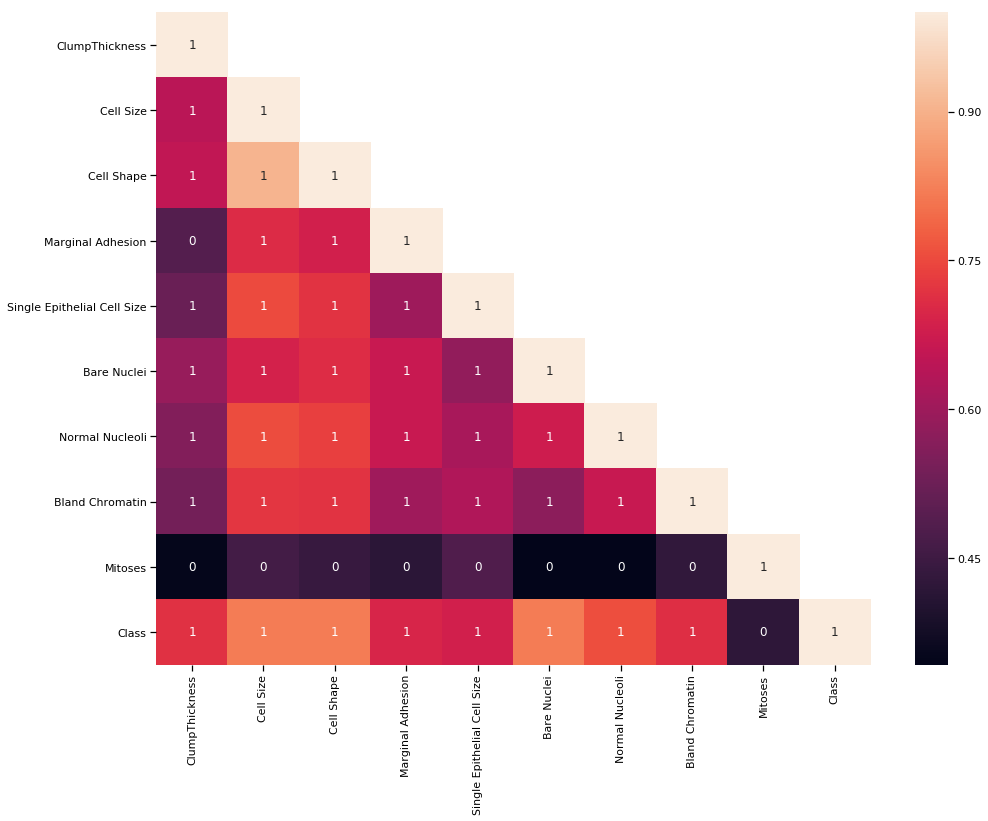

In [17]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 5})
plt.figure(figsize=(16,12))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='1.0f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

From above we can see some higher correlation between features
Cell Shape - Cell Size = 0.90
Cell Shape - Epithelial Cell Size = 0.71
Cell Size - Epithelial Cell Size = 0.75

There are multiple feature showing High Correlation with Target Veriable Class

In [18]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [19]:
#Let us check for pair plots

C:\Users\del15\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\del15\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


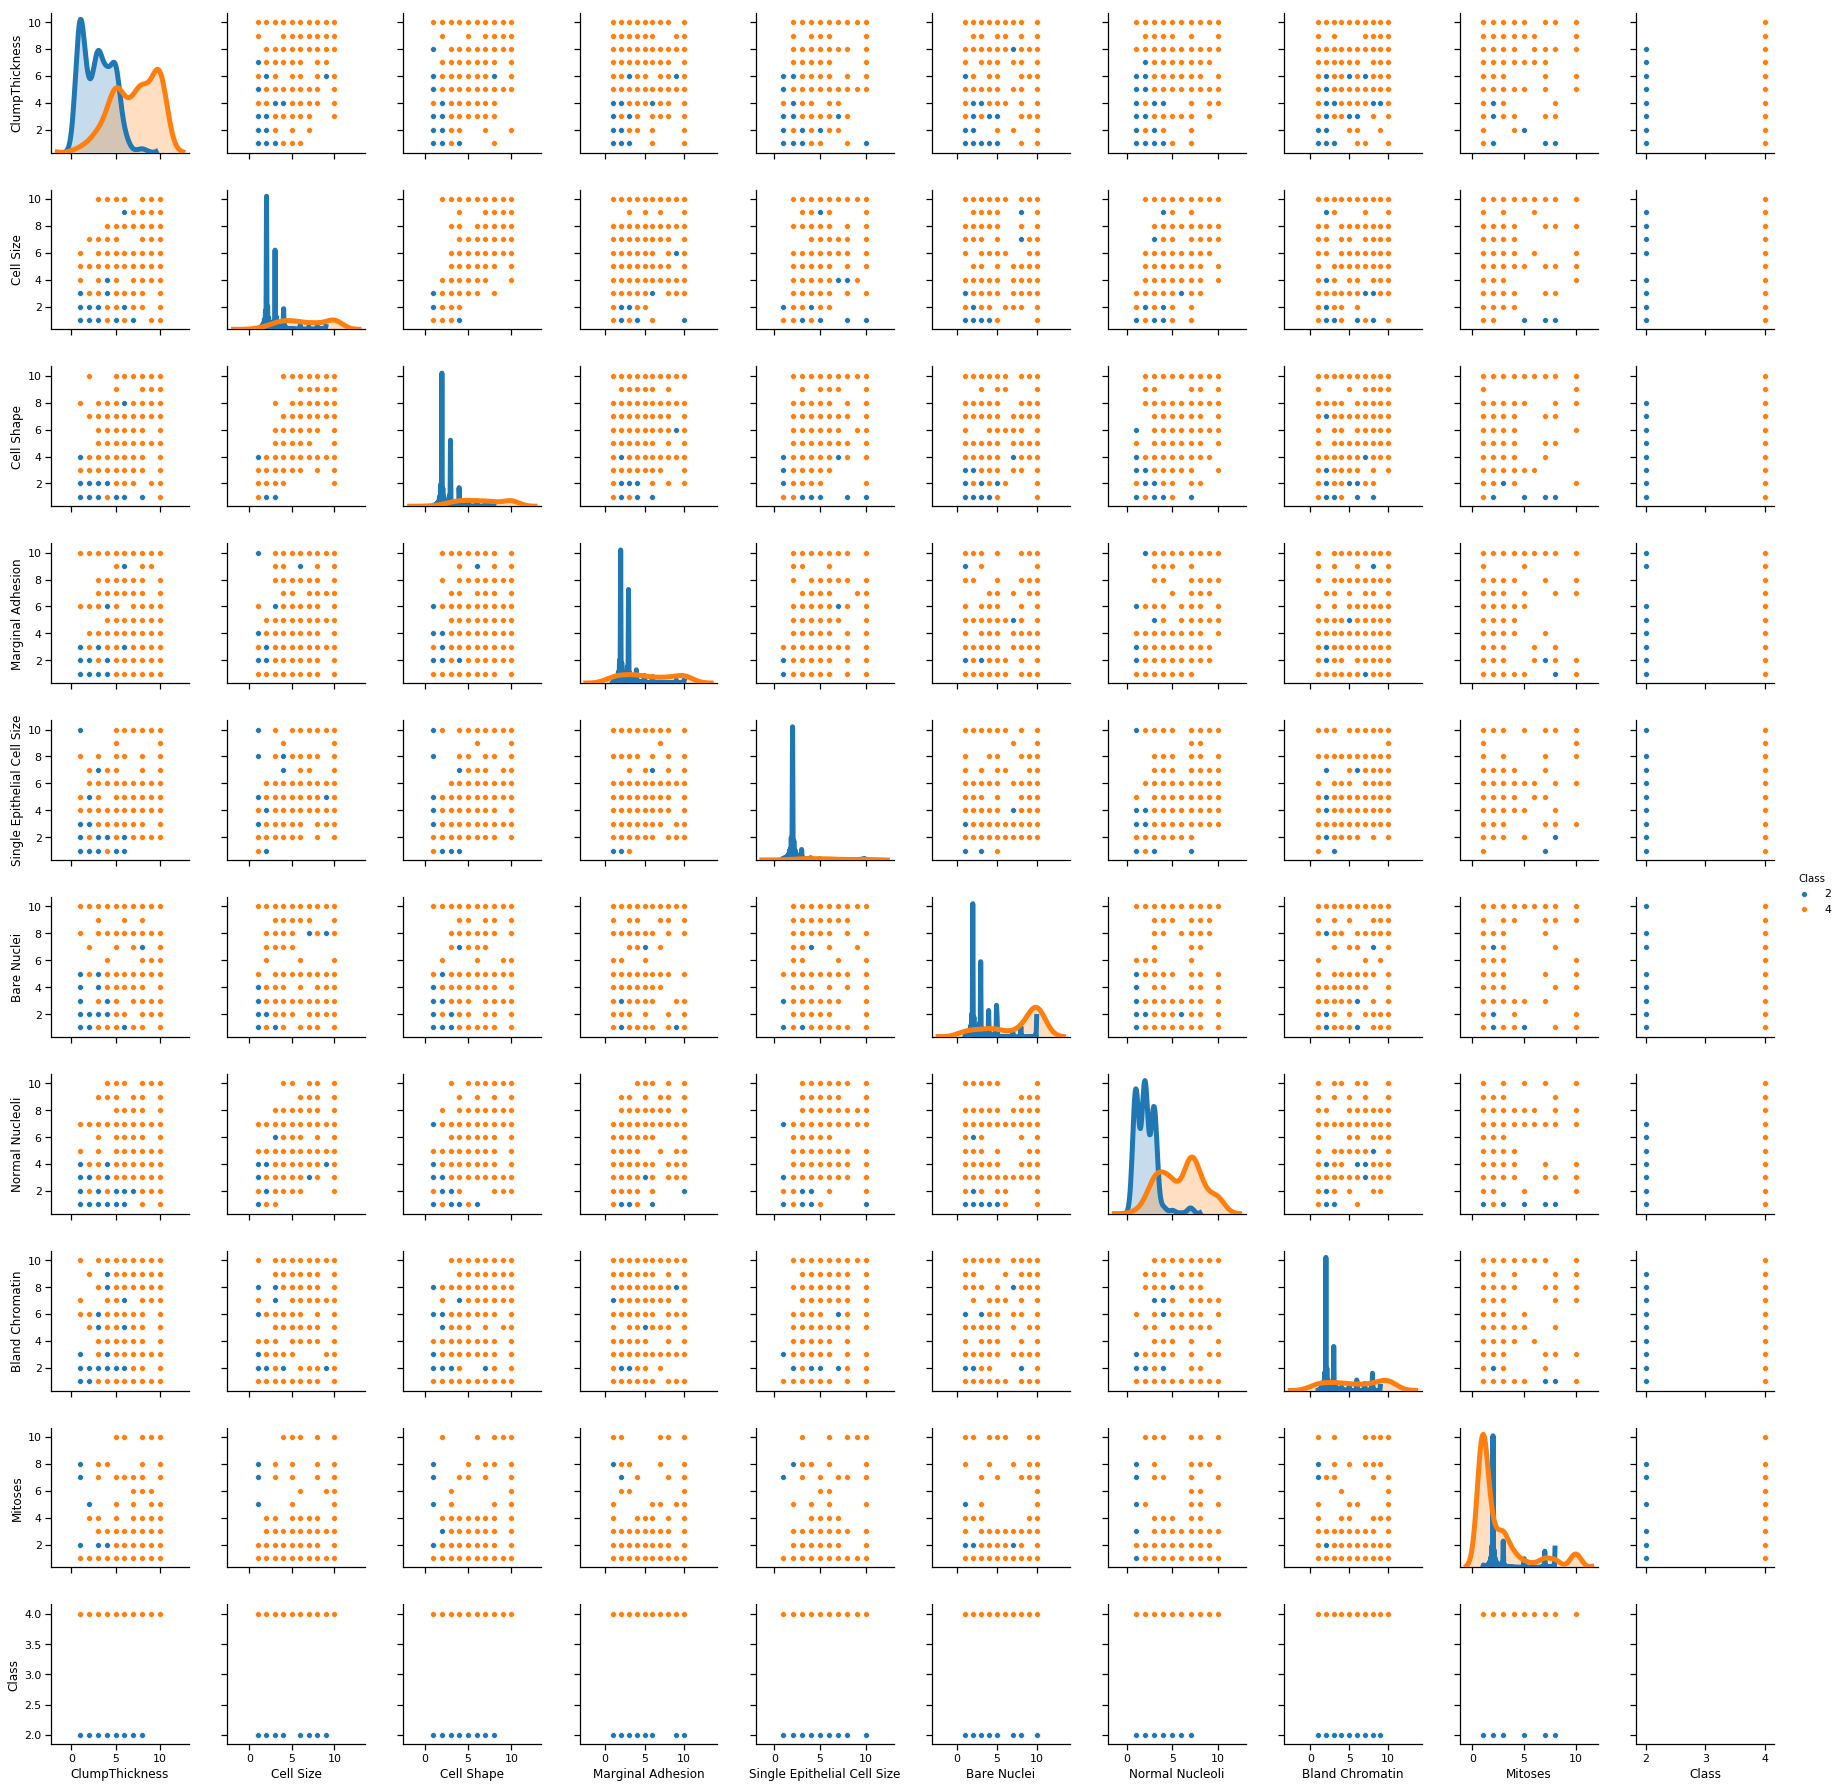

In [20]:
sns.pairplot(data,diag_kind='kde',hue='Class')

In [21]:
data.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [22]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [23]:
# Lets drop the Cell Size as we are having another similar strong feature available i.e. Cell Shape
data = data.drop('Cell Size', axis=1)

- As we are not sure if the outliers are realy outliers or Extreame values we can not decide to drop them or not
- Instead lets treat the outliers with scaling

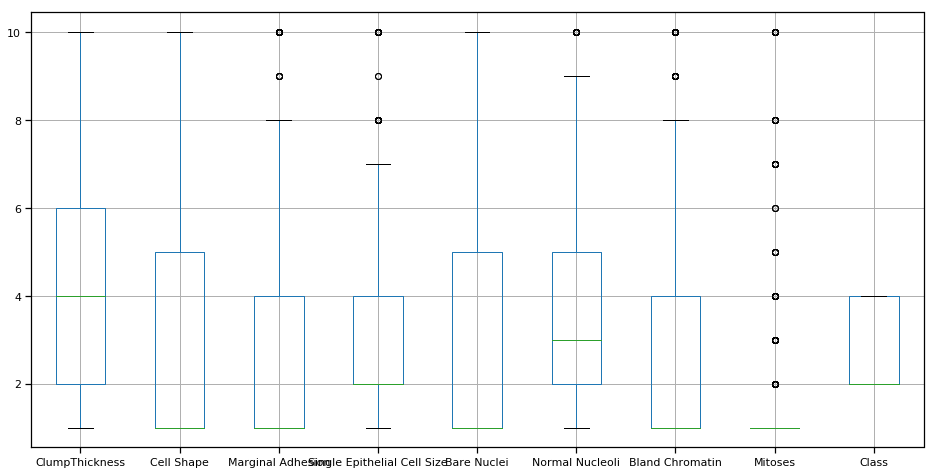

In [24]:
from scipy.stats import zscore 
data_z = data.drop('Class', axis=1).apply(zscore)
plt.figure(figsize=(16,8))
data.boxplot()
plt.show()

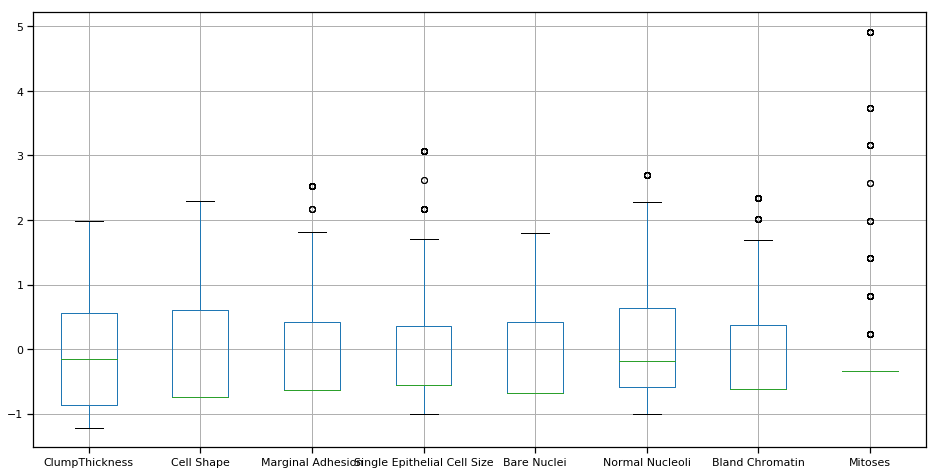

In [25]:
data_z = data.drop('Class', axis=1).apply(zscore)
plt.figure(figsize=(16,8))
data_z.boxplot()
plt.show()

- We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [26]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(data_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.65552689 0.48705303 0.52256381 0.5908535  0.5592282
  0.53660222 0.35053534]
 [0.65552689 1.00143266 0.68405782 0.72069948 0.70848734 0.73700282
  0.72047704 0.43953974]
 [0.48705303 0.68405782 1.00143266 0.60045809 0.66792658 0.66767051
  0.60421681 0.41823111]
 [0.52256381 0.72069948 0.60045809 1.00143266 0.5845377  0.61698451
  0.62978166 0.47978787]
 [0.5908535  0.70848734 0.66792658 0.5845377  1.00143266 0.67518063
  0.5756016  0.34288766]
 [0.5592282  0.73700282 0.66767051 0.61698451 0.67518063 1.00143266
  0.66683179 0.34466258]
 [0.53660222 0.72047704 0.60421681 0.62978166 0.5756016  0.66683179
  1.00143266 0.42894941]
 [0.35053534 0.43953974 0.41823111 0.47978787 0.34288766 0.34466258
  0.42894941 1.00143266]]


In [27]:
cov_matrix.shape

(8, 8)

# Q7 Identify eigen values and eigen vector

- Step 2- Get eigen values and eigen vector

In [28]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [29]:
print('Eigen Values \n%s', eigenvalues)
print('\n Eigen Vectors \n%s', eigenvectors)

Eigen Values 
%s [5.06641039 0.77417997 0.53947041 0.20835228 0.45311836 0.37608217
 0.30329545 0.29055229]

 Eigen Vectors 
%s [[-0.328833   -0.15694712 -0.85761657  0.17306239  0.06225919 -0.05980754
   0.27922308  0.12791016]
 [-0.40123552 -0.0857455  -0.03812095 -0.89532181 -0.1446066   0.08240822
  -0.02674043 -0.01364505]
 [-0.36178479 -0.05694266  0.43104837  0.04955175  0.44154656 -0.07292718
   0.68683294  0.07476629]
 [-0.36219253  0.16093233  0.10572184  0.27257831 -0.37267655  0.78382793
   0.05582586  0.03241532]
 [-0.36422166 -0.26372965  0.00866718  0.14144266  0.50173038  0.13008352
  -0.48070397 -0.52723496]
 [-0.37400117 -0.23930227  0.2015012   0.17084175 -0.05316047 -0.23455408
  -0.42304176  0.7044586 ]
 [-0.36398933  0.01740436  0.13068274  0.2053874  -0.57565475 -0.52149742
   0.07611993 -0.44588642]
 [-0.25255639  0.9009727  -0.09113166 -0.01780567  0.23542249 -0.16133954
  -0.17501004  0.06130849]]


In [30]:
# Lets pair both the vectors into single record
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[ :, i]) for i in range(len(eigenvalues))]

In [31]:
# Sort the pair values in decending order
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)

In [32]:
eigen_pairs

[(5.066410389295321,
  array([-0.328833  , -0.40123552, -0.36178479, -0.36219253, -0.36422166,
         -0.37400117, -0.36398933, -0.25255639])),
 (0.7741799732436658,
  array([-0.15694712, -0.0857455 , -0.05694266,  0.16093233, -0.26372965,
         -0.23930227,  0.01740436,  0.9009727 ])),
 (0.5394704050930027,
  array([-0.85761657, -0.03812095,  0.43104837,  0.10572184,  0.00866718,
          0.2015012 ,  0.13068274, -0.09113166])),
 (0.20835228401933856,
  array([ 0.17306239, -0.89532181,  0.04955175,  0.27257831,  0.14144266,
          0.17084175,  0.2053874 , -0.01780567])),
 (0.4531183573410718,
  array([ 0.06225919, -0.1446066 ,  0.44154656, -0.37267655,  0.50173038,
         -0.05316047, -0.57565475,  0.23542249])),
 (0.3760821715643453,
  array([-0.05980754,  0.08240822, -0.07292718,  0.78382793,  0.13008352,
         -0.23455408, -0.52149742, -0.16133954])),
 (0.3032954505309507,
  array([ 0.27922308, -0.02674043,  0.68683294,  0.05582586, -0.48070397,
         -0.42304176, 

In [33]:
eigen_pairs_sorted

[(5.066410389295321,
  array([-0.328833  , -0.40123552, -0.36178479, -0.36219253, -0.36422166,
         -0.37400117, -0.36398933, -0.25255639])),
 (0.7741799732436658,
  array([-0.15694712, -0.0857455 , -0.05694266,  0.16093233, -0.26372965,
         -0.23930227,  0.01740436,  0.9009727 ])),
 (0.5394704050930027,
  array([-0.85761657, -0.03812095,  0.43104837,  0.10572184,  0.00866718,
          0.2015012 ,  0.13068274, -0.09113166])),
 (0.4531183573410718,
  array([ 0.06225919, -0.1446066 ,  0.44154656, -0.37267655,  0.50173038,
         -0.05316047, -0.57565475,  0.23542249])),
 (0.3760821715643453,
  array([-0.05980754,  0.08240822, -0.07292718,  0.78382793,  0.13008352,
         -0.23455408, -0.52149742, -0.16133954])),
 (0.3032954505309507,
  array([ 0.27922308, -0.02674043,  0.68683294,  0.05582586, -0.48070397,
         -0.42304176,  0.07611993, -0.17501004])),
 (0.29055228696387536,
  array([ 0.12791016, -0.01364505,  0.07476629,  0.03241532, -0.52723496,
          0.7044586 , 

# Q8 Find variance and cumulative variance by each eigen vector

In [34]:
total = sum(eigenvalues)

In [35]:
var_exp = [( i /total ) * 100 for i in sorted(eigenvalues, reverse=True)]
print("Individual explained variance:\n", var_exp)

Individual explained variance:
 [63.23952882203392, 9.663405245423446, 6.733732881883336, 5.655876491846716, 4.694301783832497, 3.78576939325114, 3.626707730700736, 2.6006776510282266]


In [36]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained:\n", cum_var_exp)

Cumulative Variance Explained:
 [ 63.23952882  72.90293407  79.63666695  85.29254344  89.98684523
  93.77261462  97.39932235 100.        ]


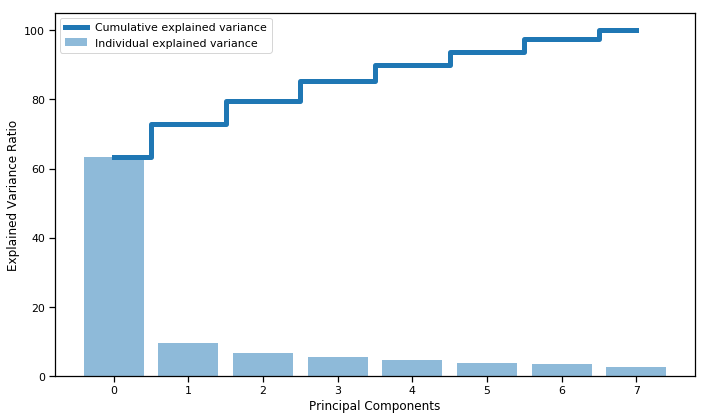

In [37]:
plt.figure(figsize=(10 , 6))
plt.bar(range(len(var_exp)), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=6)

In [40]:
X_reduced = pca.fit_transform(data_z)

In [41]:
X_reduced.shape

(699, 6)

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init = 30, random_state=2)
kmeans.fit(X_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [43]:
kmeans.inertia_

2253.242621844175

In [44]:
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = ['pc1','pc2','pc3','pc4','pc5','pc6'] )
centroid_df

,pc1,pc2,pc3,pc4,pc5,pc6
0,-1.497792,0.083048,0.012279,0.002904,-0.017413,0.022278
1,2.846427,-0.157826,-0.023335,-0.005518,0.033091,-0.042338


In [45]:
Label=pd.DataFrame(kmeans.labels_)
Label[0].value_counts()

0    458
1    241
Name: 0, dtype: int64

In [46]:
data.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

# Q10 Find correlation between components and features

In [47]:
pca.components_

array([[ 0.328833  ,  0.40123552,  0.36178479,  0.36219253,  0.36422166,
         0.37400117,  0.36398933,  0.25255639],
       [-0.15694712, -0.0857455 , -0.05694266,  0.16093233, -0.26372965,
        -0.23930227,  0.01740436,  0.9009727 ],
       [-0.85761657, -0.03812095,  0.43104837,  0.10572184,  0.00866718,
         0.2015012 ,  0.13068274, -0.09113166],
       [-0.06225919,  0.1446066 , -0.44154656,  0.37267655, -0.50173038,
         0.05316047,  0.57565475, -0.23542249],
       [-0.05980754,  0.08240822, -0.07292718,  0.78382793,  0.13008352,
        -0.23455408, -0.52149742, -0.16133954],
       [ 0.27922308, -0.02674043,  0.68683294,  0.05582586, -0.48070397,
        -0.42304176,  0.07611993, -0.17501004]])

In [48]:
data_corr = pd.DataFrame(data=pca.components_,columns=data_z.columns)

In [49]:
data_corr

,ClumpThickness,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.328833,0.401236,0.361785,0.362193,0.364222,0.374001,0.363989,0.252556
1,-0.156947,-0.085746,-0.056943,0.160932,-0.263730,-0.239302,0.017404,0.900973
2,-0.857617,-0.038121,0.431048,0.105722,0.008667,0.201501,0.130683,-0.091132
3,-0.062259,0.144607,-0.441547,0.372677,-0.501730,0.053160,0.575655,-0.235422
4,-0.059808,0.082408,-0.072927,0.783828,0.130084,-0.234554,-0.521497,-0.161340
5,0.279223,-0.026740,0.686833,0.055826,-0.480704,-0.423042,0.076120,-0.175010


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

In [50]:
data = pd.read_csv("movies_metadata.csv")
data.head()

C:\Users\del15\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

In [51]:
data.shape

(45466, 24)

In [52]:
data.fillna(" ", inplace=True)

In [53]:
# Place the DataFrames side by side
data['description'] = data.overview + " " + data.tagline

In [54]:
data[['overview', 'tagline','description']].head(10)

,overview,tagline,description
0,"Led by Woody, Andy's toys live happily in his ...",,"Led by Woody, Andy's toys live happily in his ..."
1,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...
2,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...
3,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom..."
4,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...
5,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,"Obsessive master thief, Neil McCauley leads a ..."
6,An ugly duckling having undergone a remarkable...,You are cordially invited to the most surprisi...,An ugly duckling having undergone a remarkable...
7,"A mischievous young boy, Tom Sawyer, witnesses...",The Original Bad Boys.,"A mischievous young boy, Tom Sawyer, witnesses..."
8,International action superstar Jean Claude Van...,Terror goes into overtime.,International action superstar Jean Claude Van...
9,James Bond must unmask the mysterious head of ...,No limits. No fears. No substitutes.,James Bond must unmask the mysterious head of ...


# Q13  Lets drop the null values in `description` column

In [55]:
data['description'].isnull().sum()

0

- Null values in description were coming from null values in Tagline / overview columns
- removing null values from origin columns are giving us some datainstead of no data

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

In [56]:
data['title'].value_counts().head(10)

Cinderella              11
Alice in Wonderland      9
Hamlet                   9
Les Misérables           8
Beauty and the Beast     8
The Three Musketeers     7
A Christmas Carol        7
Treasure Island          7
Blackout                 7
Aftermath                6
Name: title, dtype: int64

In [57]:
data.sort_values("title", inplace = True) 

In [58]:
data.drop_duplicates('title', keep='first', inplace=True)

In [59]:
data['title'].value_counts().head(10)

Aligarh                                     1
Dreamworld                                  1
A Little Chaos                              1
He Walked by Night                          1
Perry Mason: The Case of the Killer Kiss    1
Bulletproof Monk                            1
Sethupathi                                  1
Poor Boy's Game                             1
Ju-on: Black Ghost                          1
Pyaar Koi Khel Nahin                        1
Name: title, dtype: int64

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

In [60]:
data.shape

(42278, 25)

In [61]:
data.reset_index(drop=True)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,description
0,False,,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,...,,,,,,,,,,A group of skiers are terrorized during spring...
1,False,,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.womenartrevolution.com/,55245,tt1699720,en,!Women Art Revolution,"Through intimate interviews, provocative art, ...",...,0,83,[],Released,40 years in the making!,!Women Art Revolution,False,4.3,2,"Through intimate interviews, provocative art, ..."
2,False,,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",,41371,tt1637976,en,#1 Cheerleader Camp,A pair of horny college guys get summer jobs a...,...,0,95,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grab your spirit sticks!,#1 Cheerleader Camp,False,3.4,23,A pair of horny college guys get summer jobs a...
3,False,,1500000,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",http://www.hashtaghorror.com/,301325,tt3526286,de,#Horror,"Inspired by actual events, a group of 12 year ...",...,0,90,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Death is trending.,#Horror,False,3.4,53,"Inspired by actual events, a group of 12 year ..."
4,False,,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.chicagogirlfilm.com/,267752,tt3060338,en,#chicagoGirl,From her childhood bedroom in the Chicago subu...,...,0,74,[],Released,The Social Network Takes on a Dictator,#chicagoGirl,False,7,1,From her childhood bedroom in the Chicago subu...
5,False,,0,"[{'id': 37, 'name': 'Western'}]",,143747,tt0060697,it,Mille dollari sul nero,Johnny Liston has just been released from pris...,...,0,104,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,,"$1,000 on the Black",False,6,2,Johnny Liston has just been released from pris...
6,False,,0,"[{'id': 18, 'name': 'Drama'}, {'id': 37, 'name...",,158079,tt0060937,it,Centomila dollari per Ringo,A stranger rides into Rainbow Valley where he'...,...,0,98,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,,"$100,000 for Ringo",False,5,1,A stranger rides into Rainbow Valley where he'...
7,False,,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",,4204,tt1024733,en,$5 a Day,"After being released from jail, the son of a c...",...,0,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Relationships don't come cheap!,$5 a Day,False,6,24,"After being released from jail, the son of a c..."
8,False,,0,"[{'id': 18, 'name': 'Drama'}]",,248268,tt2106284,en,$50K and a Call Girl: A Love Story,When Ross is diagnosed with terminal brain can...,...,0,90,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,$50K and a Call Girl: A Love Story,False,6.3,11,When Ross is diagnosed with terminal brain can...
9,False,,0,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",http://www.9dollars99movie.com/,19311,tt0790799,en,$9.99,"Have you ever wondered ""What is the meaning of...",...,0,78,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,$9.99,False,6,28,"Have you ever wondered ""What is the meaning of..."


In [62]:
data.shape

(42278, 25)

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

In [64]:
matrix = tf.fit_transform(data.description)

In [65]:
print(matrix)

  (0, 856259)	0.09487421849660022
  (0, 1806605)	0.2178253938996031
  (0, 1971562)	0.17274754317326987
  (0, 1852231)	0.1560146497666129
  (0, 232601)	0.1229685290400564
  (0, 1776101)	0.17903371139171875
  (0, 1934188)	0.18700259636534639
  (0, 1818212)	0.1586009768704956
  (0, 858439)	0.2493706356651601
  (0, 1806618)	0.2493706356651601
  (0, 1971655)	0.2493706356651601
  (0, 1852285)	0.18931866991336485
  (0, 233285)	0.2493706356651601
  (0, 1776191)	0.2493706356651601
  (0, 1934223)	0.2493706356651601
  (0, 858440)	0.2493706356651601
  (0, 1806619)	0.2493706356651601
  (0, 1971656)	0.2493706356651601
  (0, 1852305)	0.2493706356651601
  (0, 233286)	0.2493706356651601
  (0, 1776192)	0.2493706356651601
  (1, 1007229)	0.07004497694317699
  (1, 1006339)	0.06395474646568475
  (1, 1573305)	0.0837664104449671
  (1, 114697)	0.24850191250402792
  :	:
  (42277, 1125255)	0.14735970976043947
  (42277, 2042347)	0.1577186348512431
  (42277, 247404)	0.16377821757714273
  (42277, 901645)	0.16377821

# Q17  Create cosine similarity matrix

In [66]:
from sklearn.metrics.pairwise import cosine_similarity

In [67]:
# generating the cosine similarity matrix
# cosine_sim = cosine_similarity(count_matrix, count_matrix)

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [68]:
data = pd.read_csv("jokes.csv")
data.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [69]:
data.shape

(24983, 101)

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [70]:
ratings = data.iloc[:200,1:]
ratings.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [71]:
ratings.columns = np.arange(0, 100)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [72]:
ratings.replace(99.00, 0, inplace=True)

In [73]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [74]:
ratings_diff = ratings.apply(zscore)
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [75]:
# Top 10 Joke ID's
ratings_diff.mean().sort_values(ascending=False).head(10)  

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64

In [76]:
# Bottom 10 Joke ID's
ratings_diff.mean().sort_values(ascending=True).head(10)

84   -2.045586e-16
15   -1.065814e-16
31   -1.032507e-16
1    -9.658940e-17
71   -9.325873e-17
11   -8.604228e-17
86   -8.465451e-17
34   -7.549517e-17
93   -7.244205e-17
79   -6.938894e-17
dtype: float64